In [57]:
import sys
sys.path.append('../utils')
import simulation as sim
import numpy as np
import random

# Definir el plano del hospital


In [58]:
width = 53
height = 36
hospital = sim.Hospital(width, height)

for i in range(width):
    hospital.add_element(sim.Wall((i, 0)))
    hospital.add_element(sim.Wall((i, height - 1)))
for i in range(height):
    hospital.add_element(sim.Wall((0, i)))
    hospital.add_element(sim.Wall((width-1, i)))
    
for y in range(36):
    l = (4, 5, 13, 19, 25, 31)
    if y not in l:
        hospital.add_element(sim.Wall((9, y)))
        
for x in range(9):
    for y in (10, 16, 22, 28):
        hospital.add_element(sim.Wall((x, y)))

for y in range(9):
    if y not in (5, 6):
        hospital.add_element(sim.Wall((14, y)))

for y in range(9, 19):
    for x in (14, 23, 32, 41):
        hospital.add_element(sim.Wall((x, y)))

for x in range(14, 52):
    hospital.add_element(sim.Wall((x, 9)))
    
    if x not in (19, 28, 38, 46, 18, 27, 36, 45):
        hospital.add_element(sim.Wall((x, 18)))
        
for x in range(29, 52):
    hospital.add_element(sim.Wall((x, 23)))

for x in range(29, 40):
    if x not in (34, 35):
        hospital.add_element(sim.Wall((x, 28)))

for y in range(23, 28):
    hospital.add_element(sim.Wall((29, y)))
    hospital.add_element(sim.Wall((39, y)))
    
hospital.add_element(sim.Entry((width-9, height-1)))
hospital.add_element(sim.Exit((width-8, height-1)))
hospital.add_element(sim.ICU((14, 5)))

for y in (13, 19, 25, 31):
    hospital.add_element(sim.DoctorOffice('general_practitioner', (3, y), (5, y)))
hospital.add_element(sim.DoctorOffice('psychiatrist', (3, 5), (5, 5)))
hospital.add_element(sim.DoctorOffice('surgeon', (18, 13), (18, 15)))
hospital.add_element(sim.DoctorOffice('pediatry', (27, 13), (27, 15)))
hospital.add_element(sim.DoctorOffice('gynecologist', (36, 13), (36, 15)))
hospital.add_element(sim.DoctorOffice('geriatrics', (45, 13), (45, 15)))

hospital.add_element(sim.Receptionist((45, 25), (45, 27)))
hospital.add_element(sim.Receptionist((48, 25), (48, 27)))

hospital.add_element(sim.Triage((35, 26)))

for x in range(14, 28, 2):
    for y in range(22, 31, 2):
        hospital.add_element(sim.Chair((x, y)))

# Imprime el hospital para tener algún tipo de feedback
hospital.plot().to_console()

############################################EX#######
#        #                                          #
#        #                                          #
#        #                                          #
#  D P                                              #
#        #    h h h h h h h                         #
#        #                                          #
##########    h h h h h h h  #####  ####            #
#        #                   #         #     P  P   #
#        #    h h h h h h h  #     T   #            #
#  D P                       #         #     R  R   #
#        #    h h h h h h h  #         #            #
#        #                   ########################
##########    h h h h h h h                         #
#        #                                          #
#        #                                          #
#  D P                                              #
#        #    ####  #######  ####### # ######  ######
#        #    #        #    

# Agrega los parámetros de simulación

In [59]:

hospital.parameters = {
    'objects': {
        'chair': {
            'infect_probability': 0.1,
            'cleaning_interval': sim.TimePeriod(0, 2, 0, 0),
            'radius': 0.1
        },
        'bed': {
            'infect_probability': 0.0,
            'radius': 0.0,
            'cleaning_interval': sim.TimePeriod(0, 2, 0, 0)
        }
    },
    'icu': {
        'environment': {
            'infection_probability': 0.1
        },
        'beds': 5,
        'death_probability': 0.05,
        'sleep_times': [
            {
                'time': sim.TimePeriod(1, 0, 0, 0),
                'probability': 0.2
            },
            {
                'time': sim.TimePeriod(2, 0, 0, 0),
                'probability': 0.2
            },
            {
                'time': sim.TimePeriod(4, 0, 0, 0),
                'probability': 0.2
            },
            {
                'time': sim.TimePeriod(8, 0, 0, 0),
                'probability': 0.2
            },
            {
                'time': sim.TimePeriod(16, 0, 0, 0),
                'probability': 0.2
            }
        ]
    },
    'reception': {
        'attention_time': sim.TimePeriod(0, 0, 15, 0)
    },
    'triage': {
        'icu': {
            'death_probability': 0.2,
            'probability': 0.070724557
        },
        'doctors_probabilities': [
            {
                'specialty': 'general_practitioner',
                'probability': 0.444567551
            },
            {
                'specialty': 'psychiatrist',
                'probability': 0.045610876
            },
            {
                'specialty': 'surgeon',
                'probability': 0.292939085
            },
            {
                'specialty': 'pediatry',
                'probability': 0.051335318
            },
            {
                'specialty': 'gynecologist',
                'probability': 0.075895021
            },
            {
                'specialty': 'geriatrics',
                'probability': 0.018927592
            },
        ],
        'levels': [
            {
                'level': 1,
                'probability': 0.2,
                'wait_time': sim.TimePeriod(0, 0, 0, 0)
            },
            {
                'level': 2,
                'probability': 0.2,
                'wait_time': sim.TimePeriod(0, 0, 0, 15)
            },
            {
                'level': 3,
                'probability': 0.2,
                'wait_time': sim.TimePeriod(0, 0, 0, 30)
            },
            {
                'level': 4,
                'probability': 0.2,
                'wait_time': sim.TimePeriod(0, 0, 1, 0)
            },
            {
                'level': 5,
                'probability': 0.2,
                'wait_time': sim.TimePeriod(0, 0, 2, 0)
            }
        ],
        'attention_time': sim.TimePeriod(0, 0, 15, 0)
    },
    'doctors': [
        {
            'attention_duration': sim.TimePeriod(0, 0, 15, 0),
            'specialty': 'general_practitioner'
        },
        {
            'attention_duration': sim.TimePeriod(0, 0, 15, 0),
            'specialty': 'psychiatrist'
        },
        {
            'attention_duration': sim.TimePeriod(0, 0, 15, 0),
            'specialty': 'surgeon'
        },
        {
            'attention_duration': sim.TimePeriod(0, 0, 15, 0),
            'specialty': 'gynecologist'
        },
        {
            'attention_duration': sim.TimePeriod(0, 0, 15, 0),
            'specialty': 'geriatrics'
        },
        {
            'attention_duration': sim.TimePeriod(0, 0, 15, 0),
            'specialty': 'pediatry'
        },
    ],
    'patient': {
        'walk_speed': 0.2,
        'influx': np.array([[random.randrange(1, 3) for i in range(12)] for j in range(365)]),
        'infected_probability': 0.3
    },
    'human': {
        'infect_distance': 2.0,
        'contamination_probability': 0.1,
        'incubation_time': sim.TimePeriod(0, 2, 0, 0),
        'infect_probability': 0.5
    }
}

# Valida que esten todos los parámetros necesarios
hospital.validate()

# Define las propiedades de ejecución
(Parámetros relacionados al sistema o la ejecución y no al hospital)

In [60]:
props = sim.SimulationProperties(1, 1)

In [61]:
run = sim.Simulation(props, hospital, tag='demo1x1')
run.run()

/home/martin/Repositories/sti-hpc/lib/mpich/bin/mpiexec -np 1 /home/martin/Repositories/sti-hpc/build/sti-demo /home/martin/Repositories/sti-hpc/run/be29bed70421c138f195edb796a19f08/config.props /home/martin/Repositories/sti-hpc/run/be29bed70421c138f195edb796a19f08/model.props


CompletedProcess(args=['/home/martin/Repositories/sti-hpc/lib/mpich/bin/mpiexec', '-np', '1', '/home/martin/Repositories/sti-hpc/build/sti-demo', '/home/martin/Repositories/sti-hpc/run/be29bed70421c138f195edb796a19f08/config.props', '/home/martin/Repositories/sti-hpc/run/be29bed70421c138f195edb796a19f08/model.props'], returncode=0, stdout=b'')

# Analiza la performance un poco

In [62]:
import sys
sys.path.append('../utils')
import performance as perf

metrics = perf.Metrics(f"{run.folder}")

In [63]:
print(f"Simulation time: {metrics.total_time}")

Simulation time: 0 days 00:00:35.519048257


In [64]:
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [8, 8]
plt.rcParams['figure.dpi'] = 200
metrics.plot().pie()

AttributeError: 'Metrics' object has no attribute 'ticks'

In [ ]:
metrics.plot().plot(0)

# Analiza el comportamiento de los agentes

In [67]:
import postprocess as pp

In [68]:
agents = pp.AgentsOutput(f"{run.folder}")

['' 'NO_ATTENTION' 'WAIT_IN_DOCTOR' 'RESOLVE' 'WAIT_CHAIR_2'
 'WAIT_CHAIR_1' 'WAIT_CHAIR_3' 'WAIT_ICU' 'MORGUE']


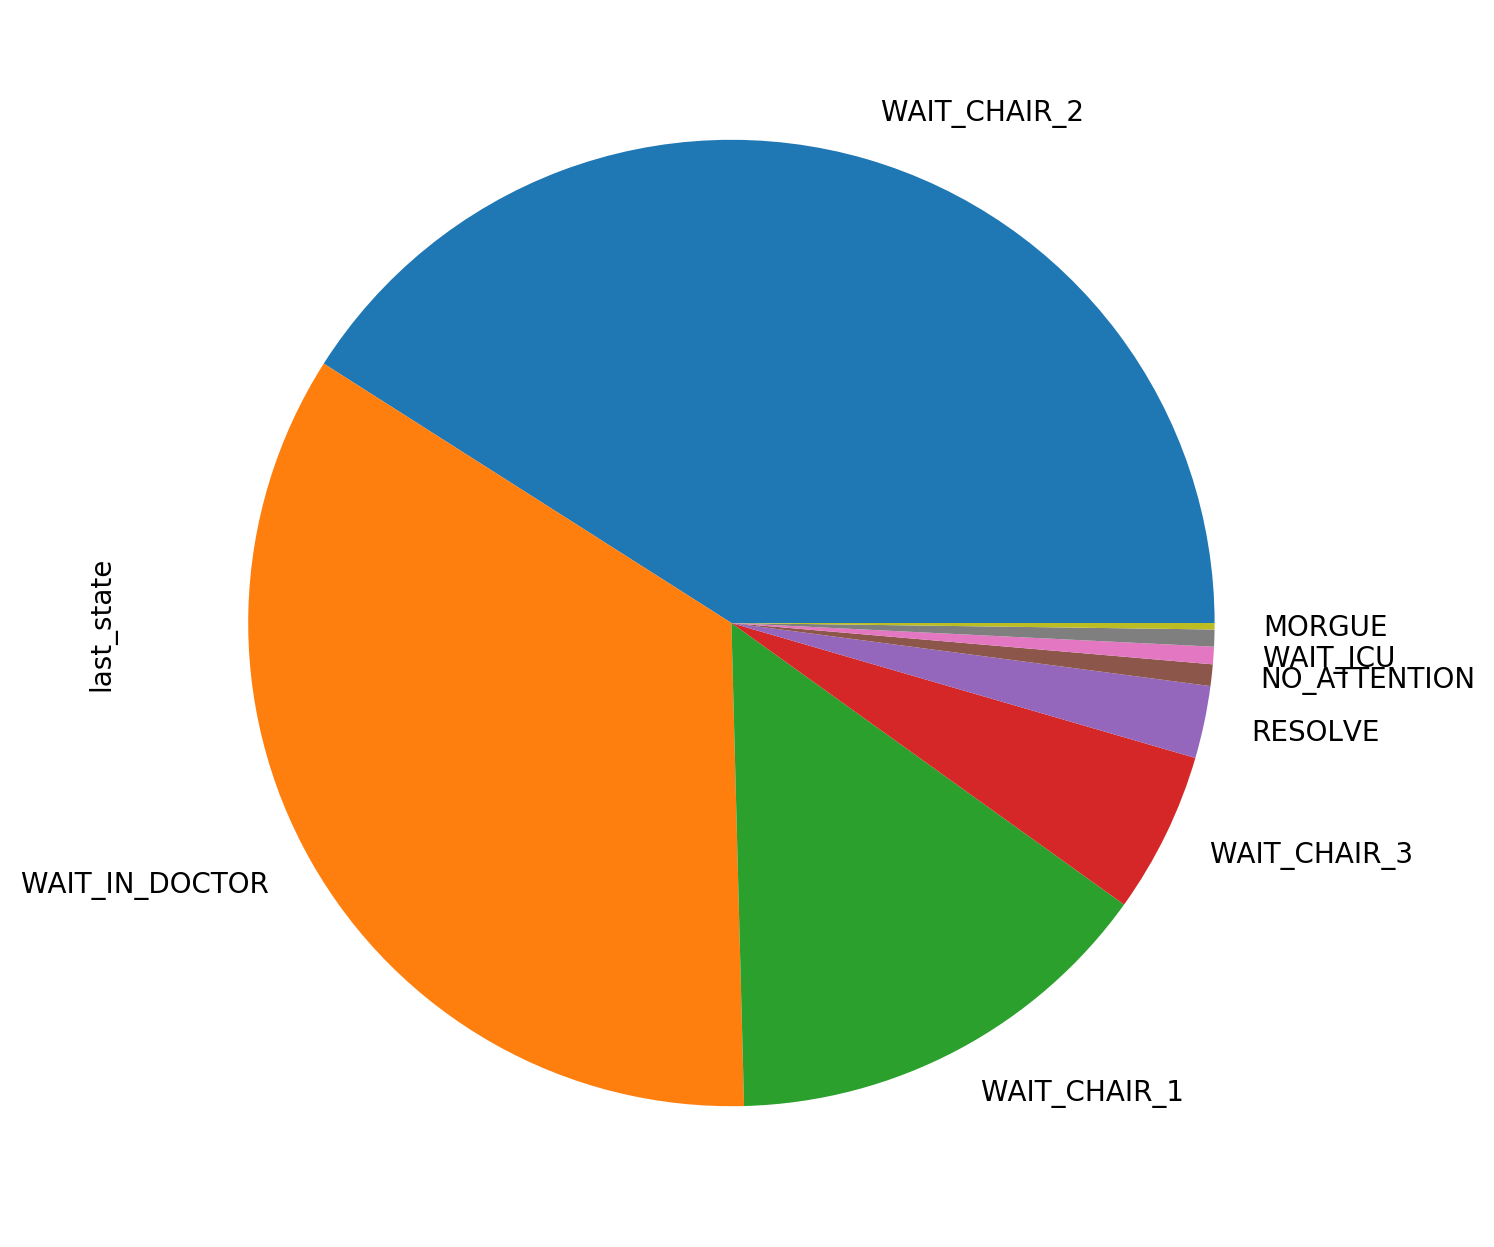

In [69]:
patients = agents.humans[agents.humans['type'] == 'patient']
print(f"{patients['last_state'].unique()}")
# patients['last_state'].hist(xrot=90, bins=len(patients['last_state'].unique()), grid=False)
patients['last_state'].value_counts().plot.pie()

In [70]:
objs = agents.objects
objs

,repast_id,type,process,infection_id,infection_stage,infection_model,infections
0,NaN,NaN,0,bed.0.0,contaminated,object,"[[human.20.0.1, {'time': 108300}], [human.20.0..."
1,NaN,NaN,0,bed.0.1,clean,object,"[[human.24.0.1, {'time': 133920}], [human.24.0..."
2,NaN,NaN,0,bed.0.2,clean,object,"[[human.39.0.1, {'time': 236640}], [human.39.0..."
3,NaN,NaN,0,bed.0.3,clean,object,"[[human.51.0.1, {'time': 314280}], [human.51.0..."
4,NaN,NaN,0,bed.0.4,clean,object,"[[human.85.0.1, {'time': 519360}], [human.85.0..."


In [71]:
df = agents.humans

In [72]:
df['last_state'].unique()

array(['', nan, 'NO_ATTENTION', 'WAIT_IN_DOCTOR', 'RESOLVE',
       'WAIT_CHAIR_2', 'WAIT_CHAIR_1', 'WAIT_CHAIR_3', 'WAIT_ICU',
       'MORGUE'], dtype=object)

In [73]:
import pandas as pd

In [74]:
df = pd.read_csv(f"{run.folder}/chair_availability.p0.csv")

In [75]:
df['free_chairs'].describe()

count    525599.000000
mean          1.058273
std           2.040357
min           0.000000
25%           0.000000
50%           1.000000
75%           1.000000
max          35.000000
Name: free_chairs, dtype: float64

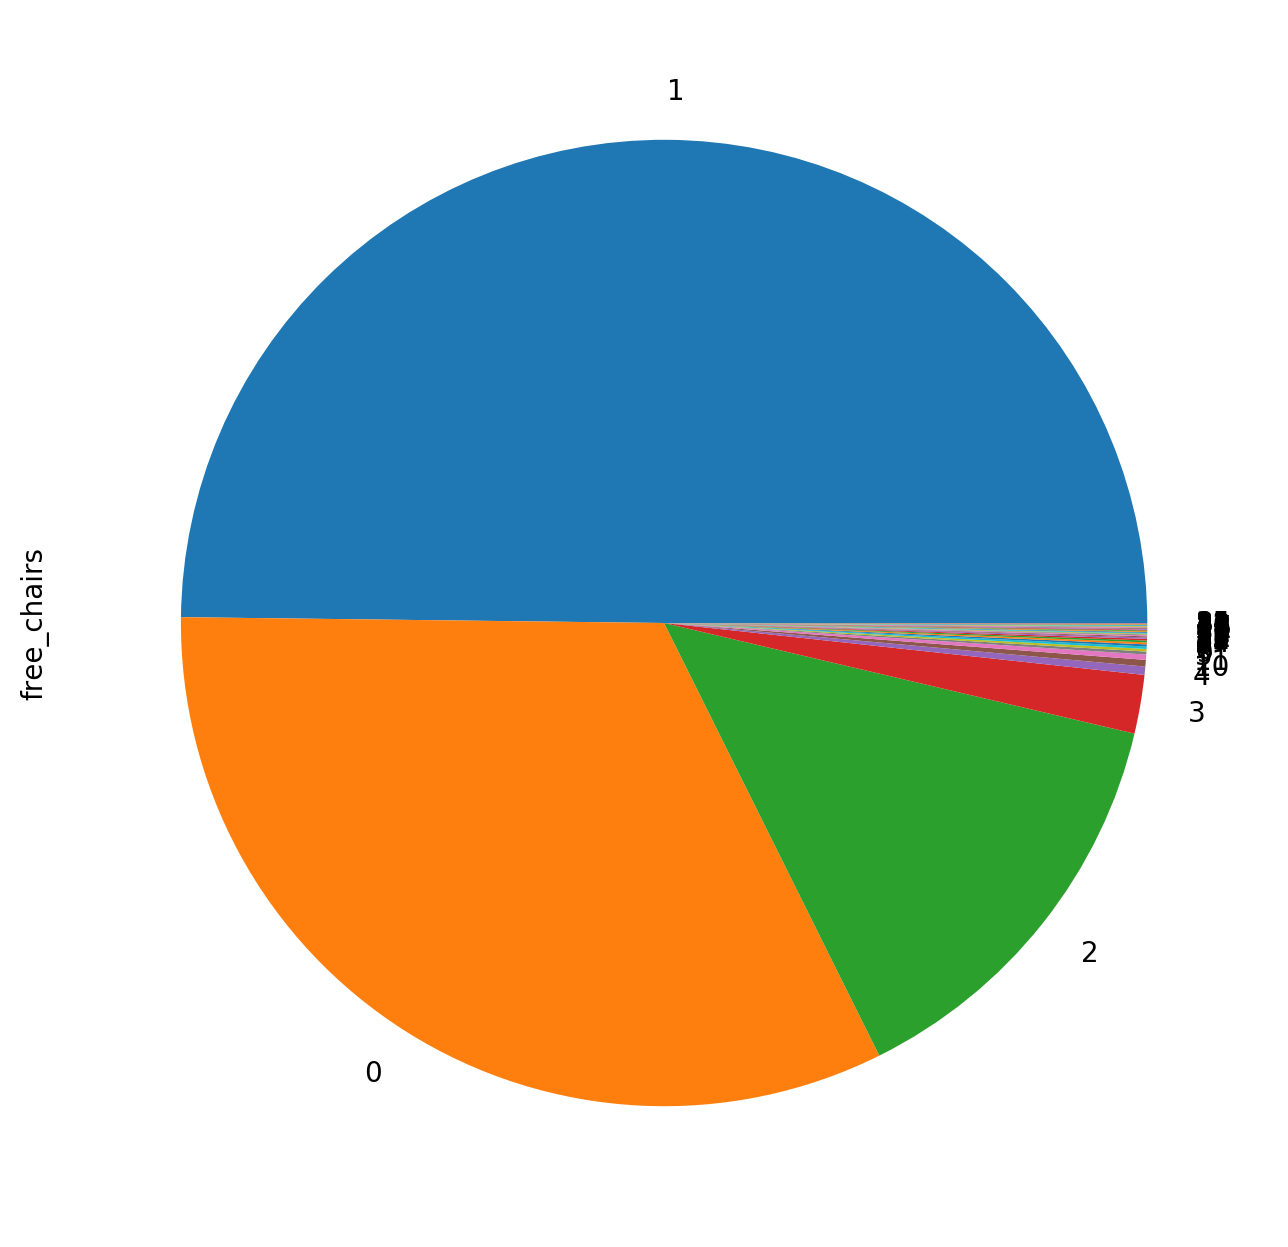

In [76]:
df['free_chairs'].value_counts().plot.pie()

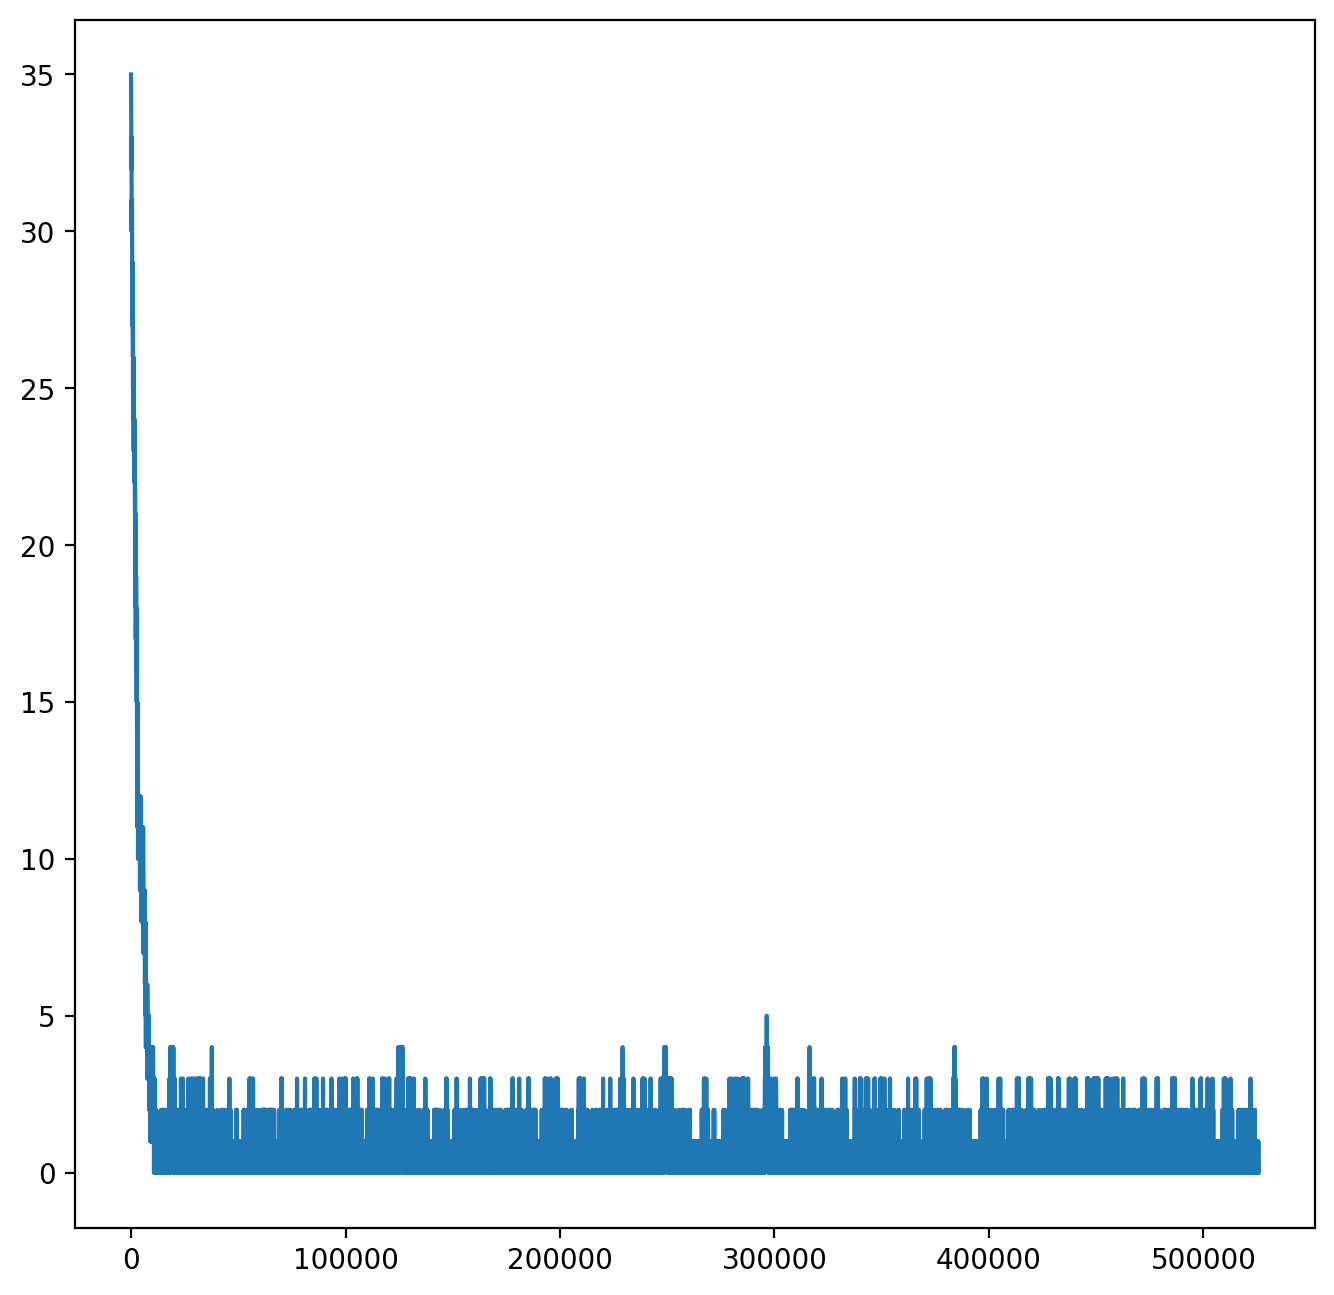

In [77]:
df['free_chairs'].plot()